<a href="https://colab.research.google.com/github/anatoliy-gorbenko/Deep-Tsetlin-Machine/blob/main/DeepTM_ISTM_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Tsetlin Machine
An example of a two-layer TM (without backpropagation) and the train-tune cycle

## Installing pyTsetlinMachineParallel

In [ ]:
!pip install pyTsetlinMachineParallel
!export OMP_NUM_THREADS=10
from pyTsetlinMachineParallel.tm import MultiClassTsetlinMachine

## Preparing the dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_val, Y_val) = mnist.load_data()

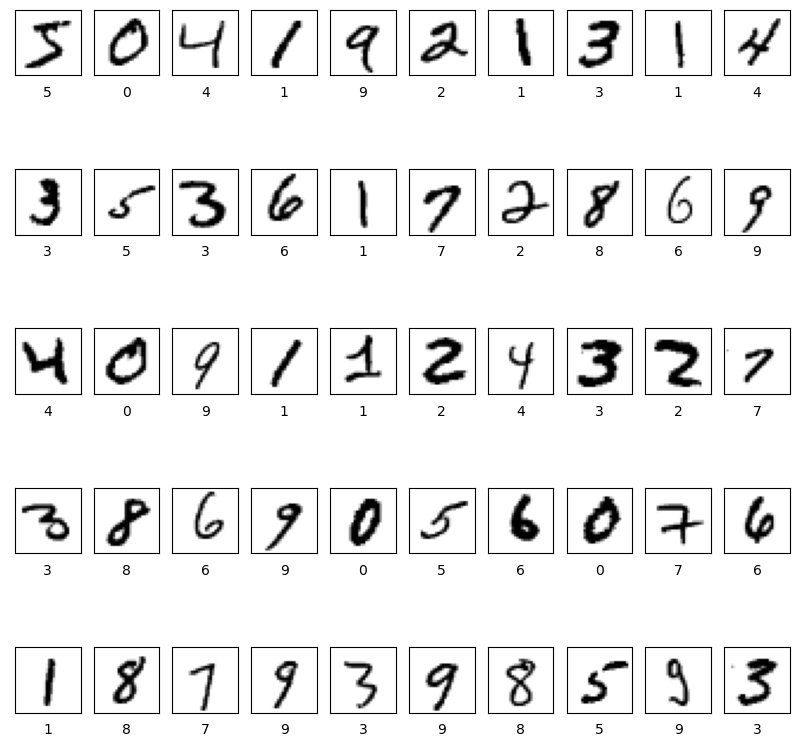

In [ ]:
# Show a sample from the input dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])

In [ ]:
# Data booleanization
import numpy as np
X_train = np.where(X_train > 75, 1, 0)
X_val = np.where(X_val > 75, 1, 0)

In [ ]:
# Input data flattening
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_val = X_val.reshape(X_val.shape[0], 28*28)
Y_train = Y_train.flatten()
Y_val = Y_val.flatten()

## Train the first-layer TM on the original dataset and evaluate its accuracy

In [ ]:
#create TM-1
tm1 = MultiClassTsetlinMachine(100, 10, 5, number_of_state_bits=8)
#train TM-1 on the original dataset
tm1.fit(X_train, Y_train, epochs=100)

#evaluate TM-1 training and validation accuracy
acc_train_1 = 100*(tm1.predict(X_train) == Y_train).mean()
acc_val_1 = 100*(tm1.predict(X_val) == Y_val).mean()
print('TM-1 training accuracy (100 training epochs):   ', acc_train_1)
print('TM-1 validation accuracy (100 training epochs): ', acc_val_1)

TM-1 training accuracy (100 training epochs):    96.72166666666666
TM-1 validation accuracy (100 training epochs):  96.0


## Tune the second-layer TM using as an input the clause outputs of the first-layer TM

In [ ]:
#create TM-2
tm2 = MultiClassTsetlinMachine(100, 10, 5, number_of_state_bits=8)
#tune TM-2 using as an input TM-1 clause outputs
#tm.transform method returns raw TM clause outputs corresponding to the input dataset
tm2.fit(tm1.transform(X_train), Y_train, epochs=100)

#evaluate TM-2 training and validation accuracy; notice how is the input defined
acc_train_2 = 100*(tm2.predict(tm1.transform(X_train)) == Y_train).mean()
acc_val_2 = 100*(tm2.predict(tm1.transform(X_val)) == Y_val).mean()
print('TM-2 training accuracy (100 tuning epochs):   ', acc_train_2)
print('TM-2 validation accuracy (100 tuning epochs): ', acc_val_2)

TM-2 training accuracy (100 tuning epochs):    98.63
TM-2 validation accuracy (100 tuning epochs):  97.06


## Compare accuracy gain:
1) TM-1 trained for 200 epoch, and
2) 2-layer TM trained for 100 epochs (TM-1) and then tuned for another 100 epochs (TM-2)

In [ ]:
#train TM-1 for another 100 epochs (200 epochs in total)
tm1.fit(X_train, Y_train, epochs=100, incremental=True)
#evaluate TM-1 training and validation accuracy
acc_train_1_200 = 100*(tm1.predict(X_train) == Y_train).mean()
acc_val_1_200 = 100*(tm1.predict(X_val) == Y_val).mean()
print('TM-1 training accuracy (200 training epochs):                  ', acc_train_1_200)
print('TM-1-2 training accuracy (100 training + 100 tuning epochs):   ', acc_train_2)
print('TM-1 validation accuracy (200 training epochs):                ', acc_val_1_200)
print('TM-1-2 validation accuracy (100 training + 100 tuning epochs): ', acc_val_2)

TM-1 training accuracy (200 training epochs):                   97.16333333333334
TM-1-2 training accuracy (100 training + 100 tuning epochs):    98.63
TM-1 validation accuracy (200 training epochs):                 96.07
TM-1-2 validation accuracy (100 training + 100 tuning epochs):  97.06
